# Mask Radar by Range
- Author: [Hamid Ali Syed](https://github.com/syedhamidali)

In [14]:
import pyart
import numpy as np
import xarray as xr
import xradar as xd
import matplotlib.pyplot as plt
from open_radar_data import DATASETS
from mask_by_range import mask_by_range # custom function

In [15]:
file = DATASETS.fetch('KLBB20160601_150025_V06')

In [16]:
radar = pyart.io.read(file)

In [4]:
radar.nsweeps

11

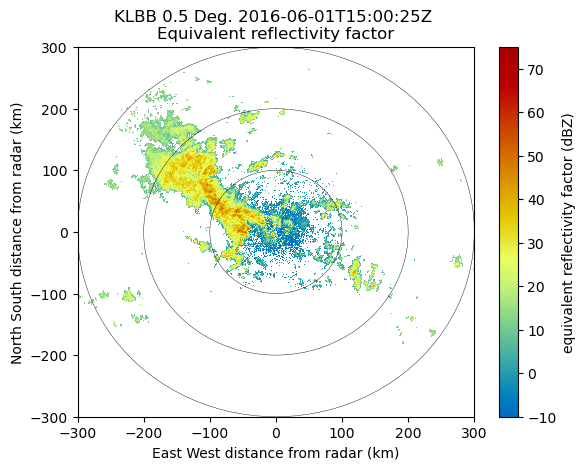

In [5]:
ppi_display = pyart.graph.RadarDisplay(radar)
ppi_display.plot_ppi('reflectivity', cmap='HomeyerRainbow', vmin=-10, vmax=75)
ppi_display.plot_range_rings(np.arange(0, 301, 100), lw=0.3)
extent = 300
ppi_display.set_limits((-extent, extent), (-extent, extent))

In [6]:
radar = mask_by_range(radar, fields=['reflectivity'],
                      max_range=200e3, mask_type='outside', 
                      suffix='_masked')

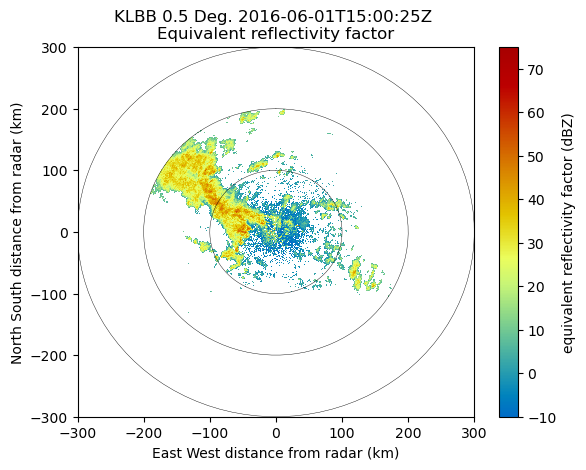

In [7]:
ppi_display = pyart.graph.RadarDisplay(radar)
ppi_display.plot_ppi('reflectivity_masked', cmap='HomeyerRainbow', vmin=-10, vmax=75)
ppi_display.plot_range_rings(np.arange(0, 301, 100), lw=0.3)
extent = 300
ppi_display.set_limits((-extent, extent), (-extent, extent))

In [8]:
radar = mask_by_range(radar, fields=['reflectivity'],
                      max_range=100e3, mask_type='inside', suffix='_masked2')

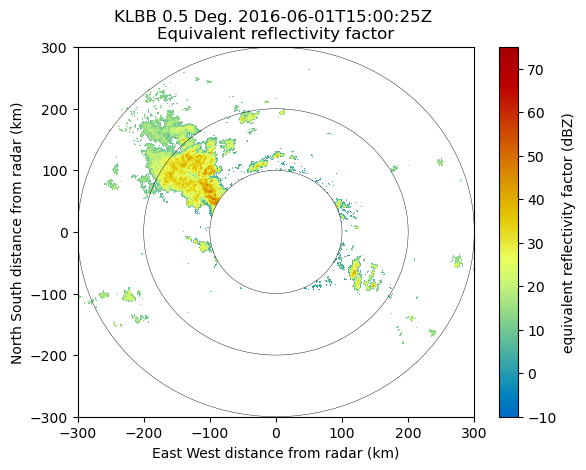

In [9]:
ppi_display = pyart.graph.RadarDisplay(radar)
ppi_display.plot_ppi('reflectivity_masked2', cmap='HomeyerRainbow', vmin=-10, vmax=75)
ppi_display.plot_range_rings(np.arange(0, 301, 100), lw=0.3)
extent = 300
ppi_display.set_limits((-extent, extent), (-extent, extent))

In [10]:
radar = mask_by_range(radar, fields=['reflectivity'],
                          min_range=50e3,
                          max_range=100e3,
                          mask_type='in_between', suffix=None)

In [11]:
radar = mask_by_range(radar, fields=['reflectivity'],
                          min_range=150e3,
                          max_range=200e3,
                          mask_type='in_between', suffix=None)

In [12]:
radar = mask_by_range(radar, fields=['reflectivity'],
                          min_range=250e3,
                          max_range=300e3,
                          mask_type='in_between', suffix=None)

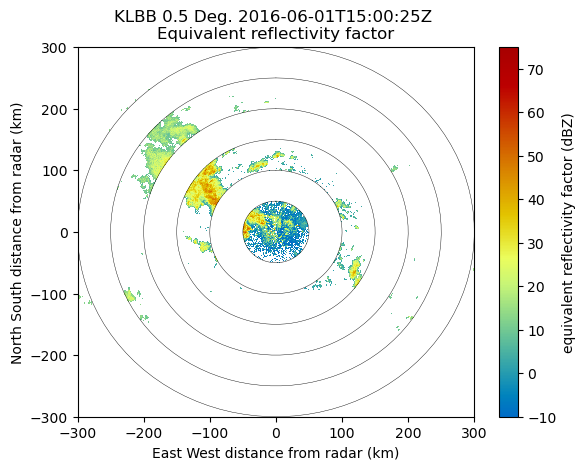

In [13]:
ppi_display = pyart.graph.RadarDisplay(radar)
ppi_display.plot_ppi('reflectivity', cmap='HomeyerRainbow', vmin=-10, vmax=75)
ppi_display.plot_range_rings(np.arange(0, 301, 50), lw=0.3)
extent = 300
ppi_display.set_limits((-extent, extent), (-extent, extent))

In [18]:
dtree = xd.io.open_nexradlevel2_datatree(file)

In [23]:
dtree = dtree.xradar.georeference()

In [25]:
ds = dtree['sweep_0'].to_dataset()

In [50]:
ds = ds.where(ds['DBZH']>-20)

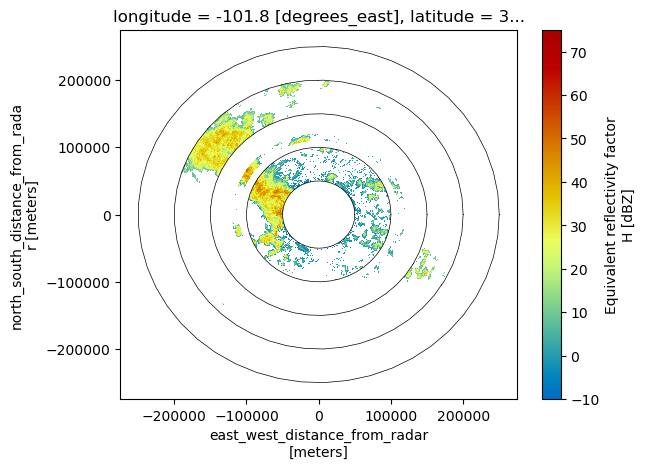

In [80]:
fig, ax = plt.subplots(1, 1)
ds.sel(range=slice(110e3, 120e3))['DBZH'].plot(x='x', y='y',
                                               cmap='HomeyerRainbow', vmin=-10, vmax=75, ax=ax)
ds.sel(range=slice(150e3, 200e3))['DBZH'].plot(x='x', y='y', add_colorbar=False,
                                               cmap='HomeyerRainbow', vmin=-10, vmax=75, ax=ax)
ds.sel(range=slice(50e3, 100e3))['DBZH'].plot(x='x', y='y', add_colorbar=False,
                                              cmap='HomeyerRainbow', vmin=-10, vmax=75, ax=ax)
t = np.linspace(0,2*np.pi)
for r in np.arange(0, 300e3, 50e3):
    a, = plt.plot(r*np.cos(t),r*np.sin(t), color='k', lw=0.5)